Die meist umkäpften Pixel im Canvas

In [1]:
from src.data.dataset_functions import get_dataframe

dataFrame = get_dataframe(True)
dataFrame.printSchema()

providing ../data/raw/2022_place_canvas_history-000000000050.csv ...
../data/raw/2022_place_canvas_history-000000000050.csv is already in data/raw
:: loading settings :: url = jar:file:/usr/local/lib/python3.9/site-packages/pyspark/jars/ivy-2.5.0.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/vscode/.ivy2/cache
The jars for the packages stored in: /home/vscode/.ivy2/jars
graphframes#graphframes added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-ad9a3d9e-cfed-4b07-84dd-d525a9a7f09e;1.0
	confs: [default]
	found graphframes#graphframes;0.8.2-spark3.2-s_2.12 in spark-packages
	found org.slf4j#slf4j-api;1.7.16 in central
:: resolution report :: resolve 82ms :: artifacts dl 4ms
	:: modules in use:
	graphframes#graphframes;0.8.2-spark3.2-s_2.12 from spark-packages in [default]
	org.slf4j#slf4j-api;1.7.16 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |   2   |   0   |   0   |   0   ||   2   |   0   |
	----------------------------------

root
 |-- user_id: string (nullable = true)
 |-- x: integer (nullable = true)
 |-- y: integer (nullable = true)
 |-- t: long (nullable = true)
 |-- pixel_color: string (nullable = true)



Nun dataFrame nach Pixel gruppieren (Hab dafür eine entsprechende Methode ergänzt)

In [2]:
from src.features.feature_functions import group_dataframe_by_pixel, group_dataframe_by_columns

groupedFrame = group_dataframe_by_pixel(dataFrame)
groupedFrame.printSchema()

root
 |-- x: integer (nullable = true)
 |-- y: integer (nullable = true)
 |-- count: long (nullable = false)
 |-- collect_list(user_id): array (nullable = false)
 |    |-- element: string (containsNull = false)
 |-- collect_list(t): array (nullable = false)
 |    |-- element: long (containsNull = false)
 |-- collect_list(pixel_color): array (nullable = false)
 |    |-- element: string (containsNull = false)



In [5]:
groupedFrame.show(2)

+---+---+-----+---------------------+--------------------+-------------------------+
|  x|  y|count|collect_list(user_id)|     collect_list(t)|collect_list(pixel_color)|
+---+---+-----+---------------------+--------------------+-------------------------+
|  0|  0| 1568| [U7ZGIDmgxWHUBUud...|[3, 1612, 16, 161...|     [#7EED56, #FFFFFF...|
|359|564| 1524| [evgpuJ6pMHVzs8PR...|[1756, 2617, 1756...|     [#000000, #000000...|
+---+---+-----+---------------------+--------------------+-------------------------+
only showing top 2 rows



Spalten, die für die Visualisierung störend sind, entfernen.

In [3]:
from src.visualization.visuialization_functions import show_and_save
import matplotlib.pyplot as plt
import numpy as np

droppedFrame = groupedFrame.drop('collect_list(t)').drop('collect_list(user_id)').drop('collect_list(pixel_color)')
droppedFrame.printSchema()

root
 |-- x: integer (nullable = true)
 |-- y: integer (nullable = true)
 |-- count: long (nullable = false)



Die Top 10 der am meisten geänderten Pixel.

In [5]:
droppedFrame.show(10)

+----+----+-----+
|   x|   y|count|
+----+----+-----+
|   0|   0| 1568|
| 359| 564| 1524|
|1999|1999| 1240|
| 349| 564| 1226|
|   0|1999| 1032|
|1890| 353|  940|
|1852| 590|  926|
| 662| 222|  916|
|1058| 756|  914|
|   8|1267|  882|
+----+----+-----+
only showing top 10 rows



Das ganze noch visualisieren.

<div style="color:lightblue">
(Sebastian): 
Was für Daten willst du anzeigen? Pro Pixel einen Balken der angibt wie oft der Pixel gesetzt wurde. Möglichkeit 1: Balken nebeneinander pro Pixel(x und y) dann ist es ein normaler 2D Bar Plot. Möglichkeit 2: X und Y sind getrennte Achsen im Plot. Dann ist es ein 3D Bar Plot. Google gibt Beispiele für 3D. Für 2D hab ich schon ein Beispiel in 0.1-heuer-nutzerfeatures

```
datacollect = groupedbypixelcountFrame.collect()
import matplotlib.pyplot as plt
import numpy as np
fig,ax = plt.subplots()
for row in datacollect:
    pixelcount,usercount = list(row)
    ax.bar(pixelcount,usercount,color='#5050cc')
ax.set_xticks(np.arange(1,21,1))
ax.set_title('Nutzerzahl pro Pixelhäufigkeit')
ax.set_ylabel('Nutzer')
ax.set_xlabel('Gesetzte Pixel')
fig.tight_layout()
plt.savefig('../reports/figures/nutzerzahl_pro_pixelhaeufigkeit.jpg',bbox_inches = 'tight')
plt.show()
```

Das Formulier ich schnell um :)
Für 3D kannst du ja selber gucken wie das geht:
https://matplotlib.org/stable/gallery/mplot3d/3d_bars.html

Schön wäre eine Balkenfarbe abhängig von der Änderungszahl:

https://stackoverflow.com/questions/44895117/colormap-for-3d-bar-plot-in-matplotlib-applied-to-every-bar

</div>

In [4]:
datacollect = droppedFrame.head(10)

<div style="color:lightblue">(Sebastian): hm die Balken müssen ein bischen Breiter sein weil die Koordinatenbeschriftung sonst zu eng ist.
Das bekommst du schon hin :)
</div>

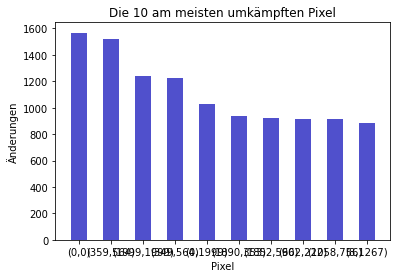

In [5]:

import matplotlib.pyplot as plt
import numpy as np
fig,ax = plt.subplots()
for row in datacollect:
    x,y,count = list(row)
    pixelcoords = '('+str(x)+','+str(y)+')'
    plt.bar(pixelcoords,count,color='#5050cc', width=0.5)
plt.title('Die 10 am meisten umkämpften Pixel')
plt.ylabel('Änderungen')
plt.xlabel('Pixel')
show_and_save(plt, 'top10_umkaempfte_pixel.jpg')
#plt.savefig('../reports/figures/top10_umkaempfte_pixel.jpg',bbox_inches = 'tight')
#plt.show()

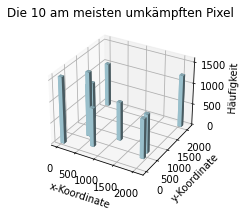

In [6]:
#setup figure and axes
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(121, projection='3d')

#data
_x = np.arange(10)
_y = np.arange(10)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

for row in datacollect:
    x,y,count = list(row)
    bottom = np.zeros_like(count)
    width = depth = 100
    ax.bar3d(x, y, bottom, width, depth, count, shade=True, color='lightblue')

ax.set_title('Die 10 am meisten umkämpften Pixel')
ax.set_xlabel('x-Koordinate')
ax.set_ylabel('y-Koordinate')
ax.set_zlabel('Häufigkeit')
show_and_save(plt, 'top10_umkaempfte_pixel_3d.jpg')
#plt.savefig('../reports/figures/top10_umkaempfte_pixel_3d.jpg',bbox_inches = 'tight')
#plt.show()

In [40]:
x_cor = []
y_cor = []
count_cor = []

#Listen befüllen
for row in datacollect:
    x,y,count = list(row)
    x_cor.append(x)
    y_cor.append(y)
    count_cor.append(count)

Siehe Code für meine Anmerkungen in Zeile 6 & 7.

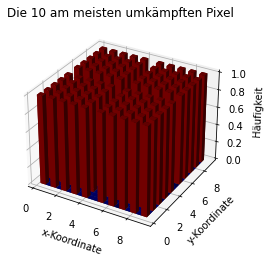

In [56]:
import matplotlib.cm as cm

fig = plt.figure()          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

#Ich hab keinen Plan was der Typ hier angestellt hat!!!
#Ich muss count_cor noch für die z-Achse einfügen aber da ich keine Ahnung habe was hier abgeht, weiß ich nicht wie ich es einbrignen soll :/

#make histogram stuff - set bins - I choose 20x20 because I have a lot of data
hist, xedges, yedges = np.histogram2d(x, y, bins=(20,20))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
ax.set_title('Die 10 am meisten umkämpften Pixel')
ax.set_xlabel('x-Koordinate')
ax.set_ylabel('y-Koordinate')
ax.set_zlabel('Häufigkeit')
plt.show()

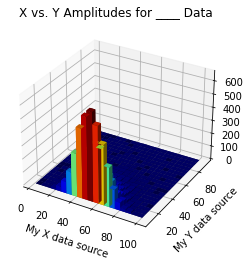

In [43]:
import matplotlib.cm as cm

xAmplitudes = np.random.exponential(10,10000) #your data here
yAmplitudes = np.random.normal(50,10,10000) #your other data here - must be same array length

x = np.array(xAmplitudes)   #turn x,y data into numpy arrays
y = np.array(yAmplitudes)   #useful for regular matplotlib arrays

fig = plt.figure()          #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')

#make histogram stuff - set bins - I choose 20x20 because I have a lot of data
hist, xedges, yedges = np.histogram2d(x, y, bins=(20,20))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.show()